In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%reload_ext autoreload
%autoreload 2

In [2]:
import os
import glob

os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from vectran.data.graphics.graphics import VectorImage
from vectran.data.graphics.units import Pixels
from vectran.renderers.cairo import render as cairo_render

from fieldlearn.data_generation.pvf_generator import PolyVectorFieldGenerator
from fieldlearn.plotting import plot_vector_field_cross

In [4]:
def show_figure(fig):

    # create a dummy figure and use its
    # manager to display "fig"

    dummy = plt.figure()
    new_manager = dummy.canvas.manager
    new_manager.canvas.figure = fig
    fig.set_canvas(new_manager.canvas)

In [9]:
def adjust_viewbox(img, size):
    img.scale((size - 2) / (max(int(img.width), int(img.height))), only_coordinates=False)

    img.view_width = Pixels(size)
    img.view_height = Pixels(size)

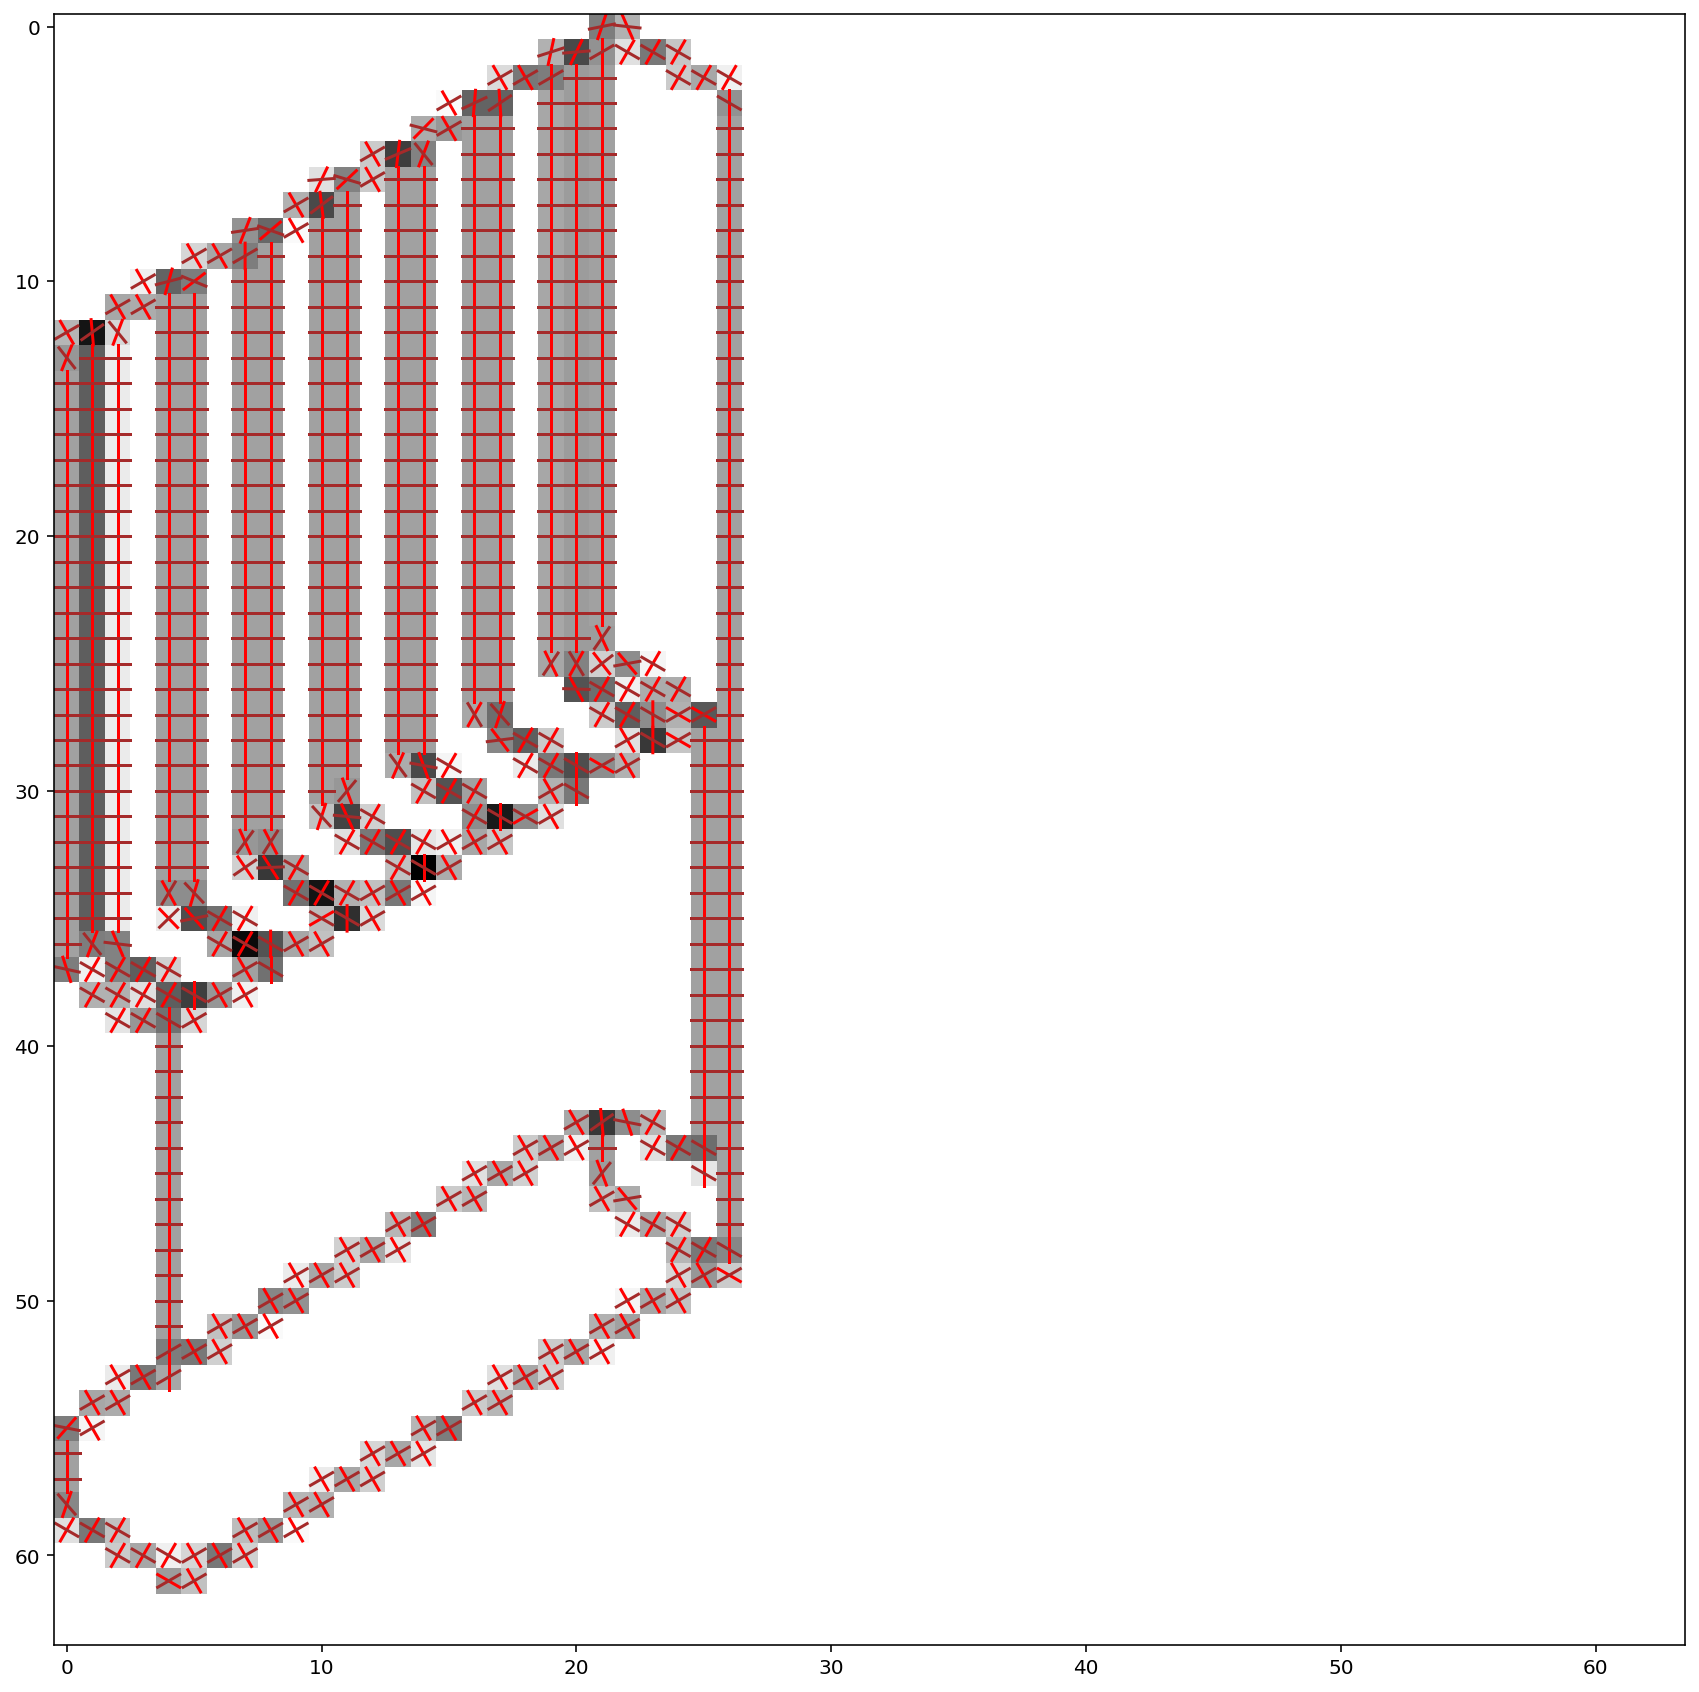

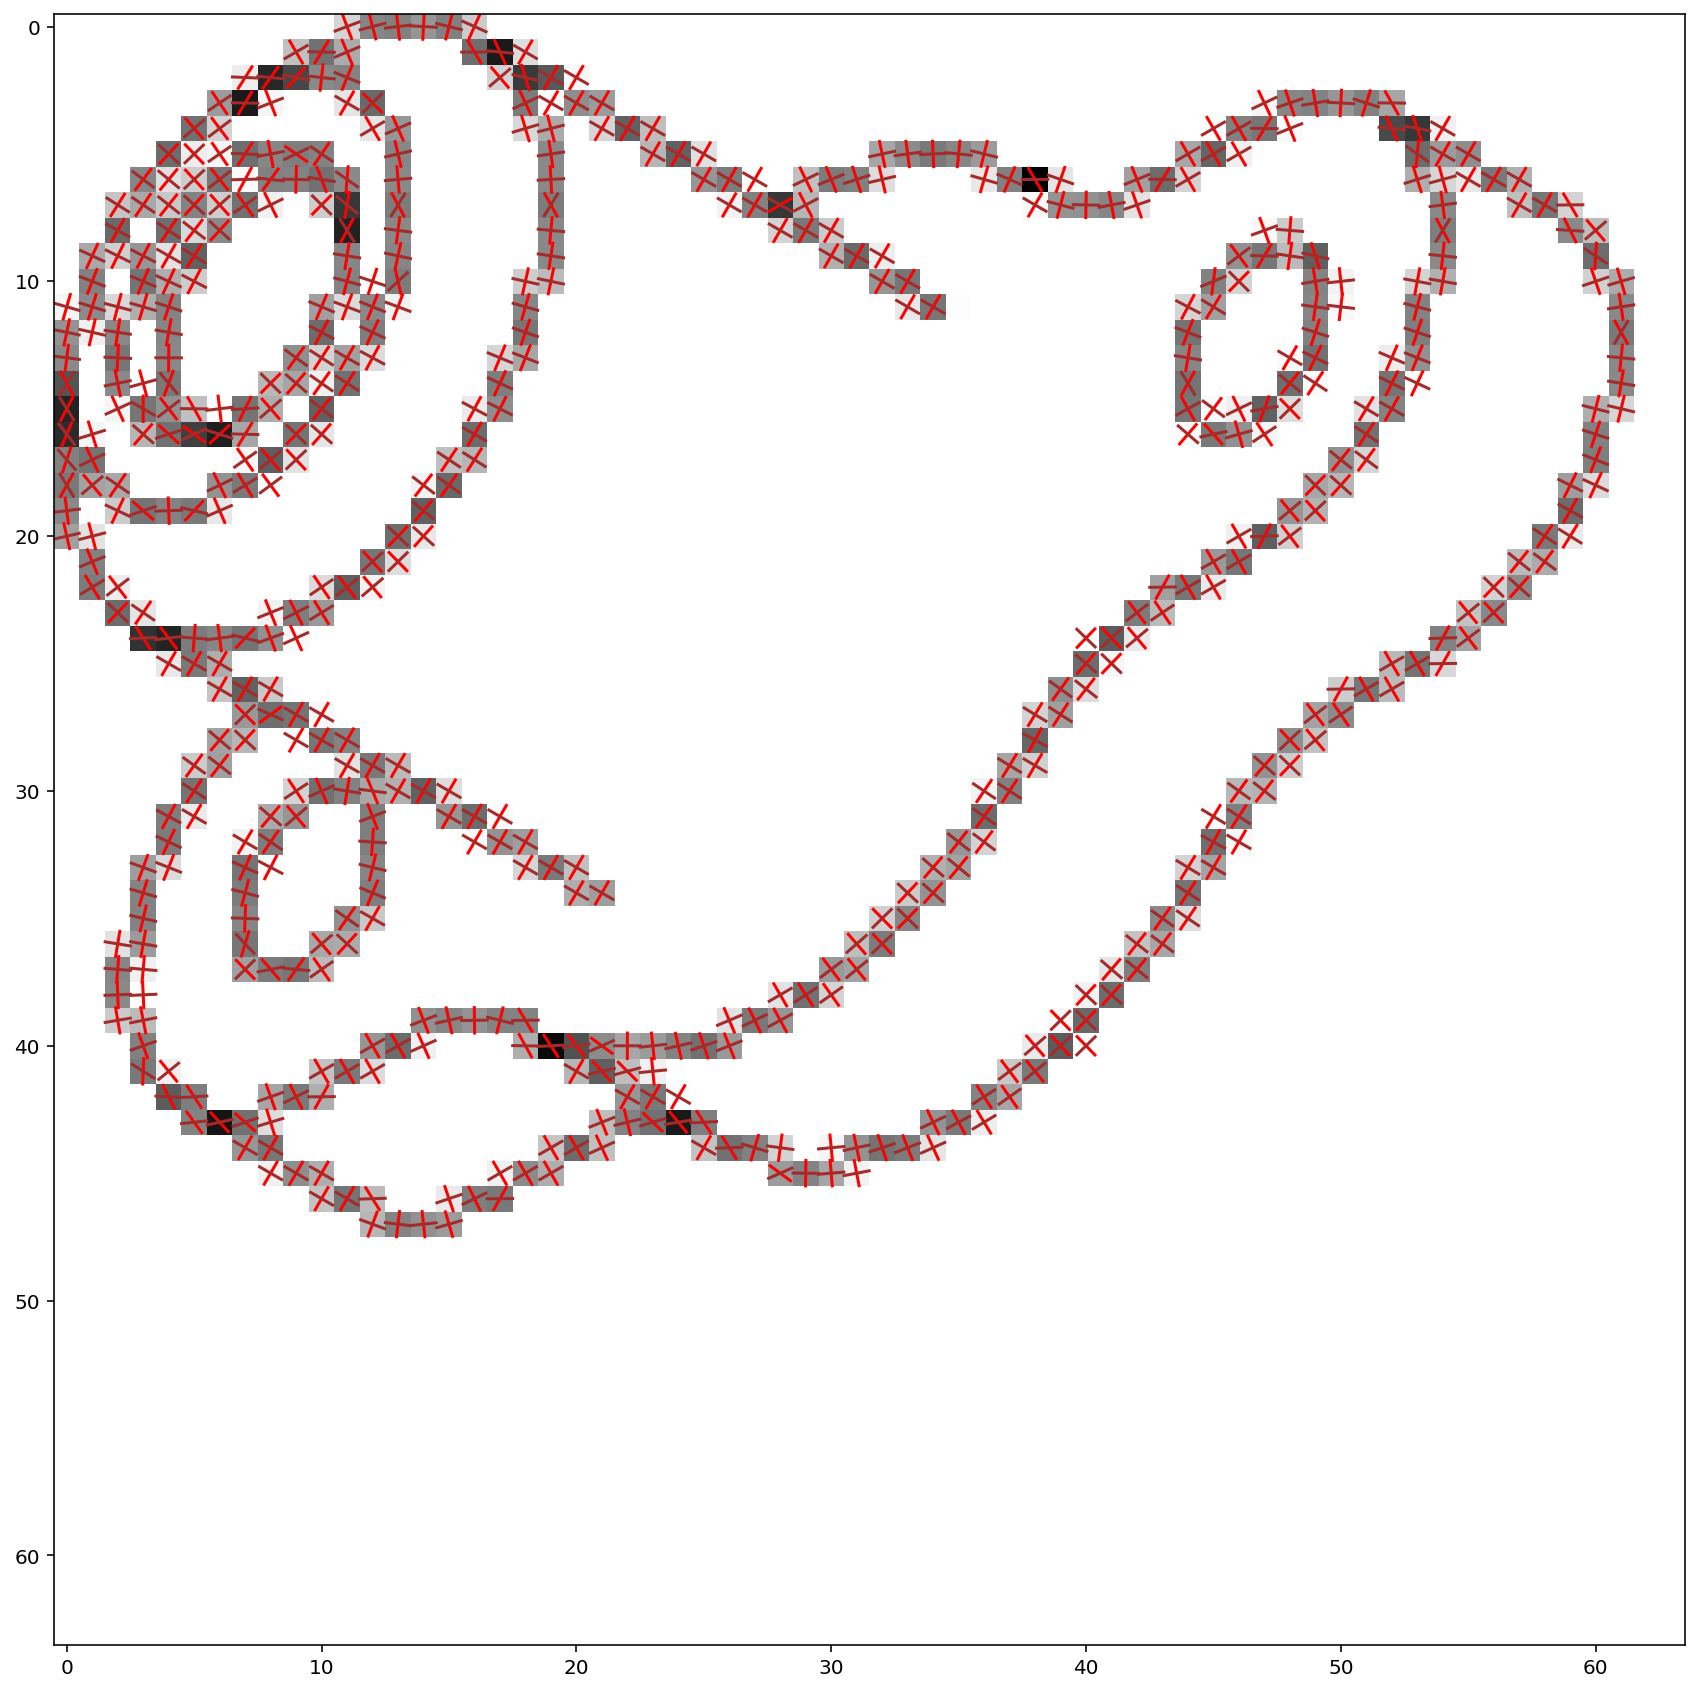

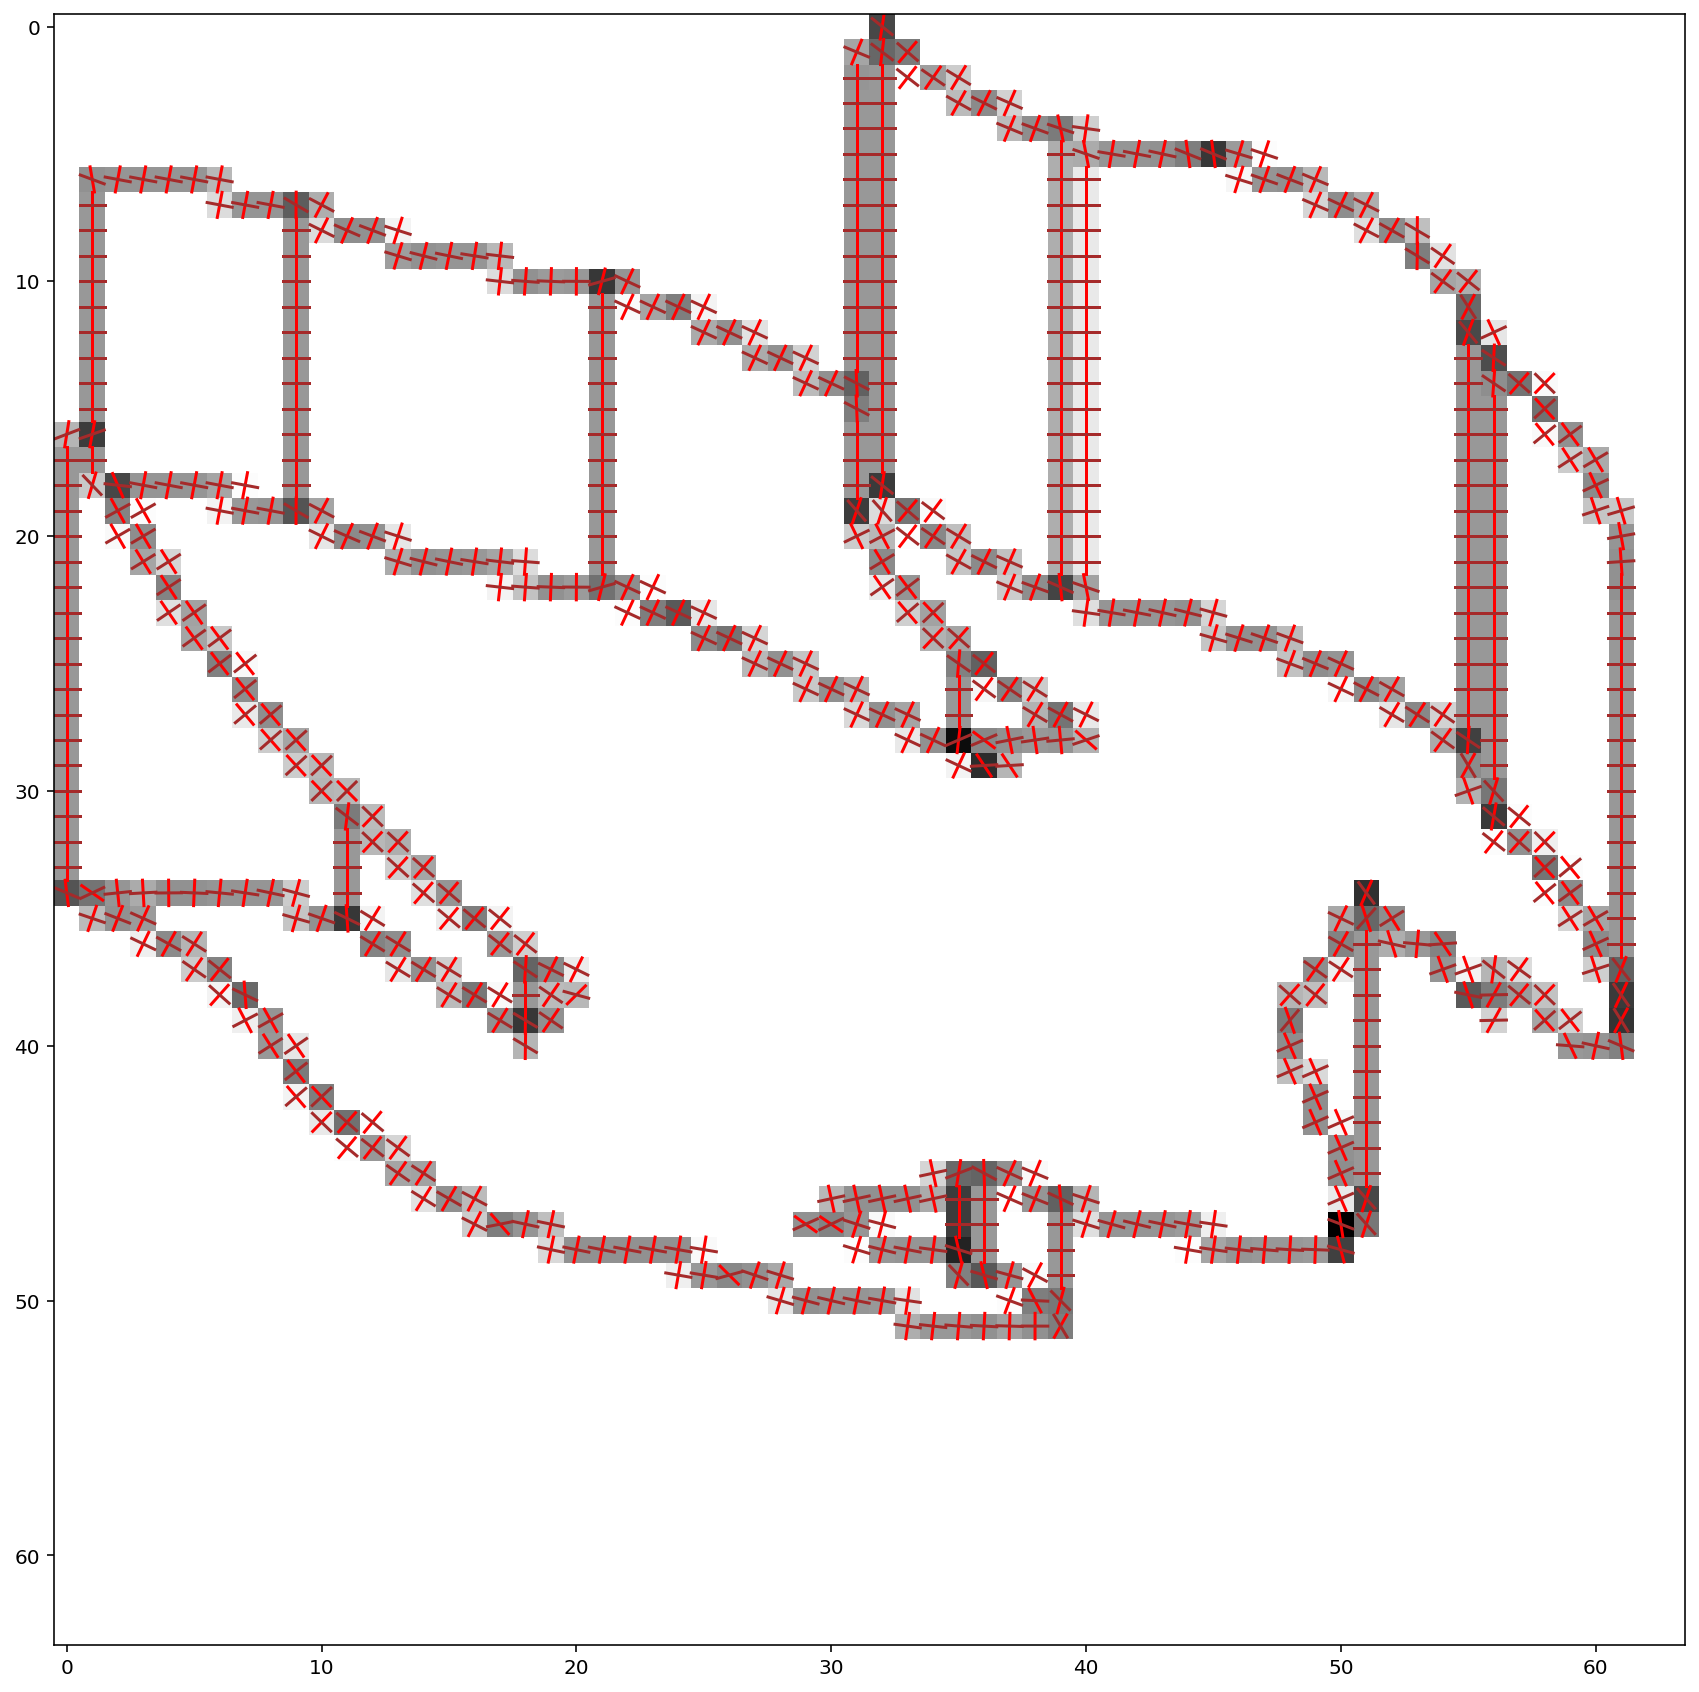

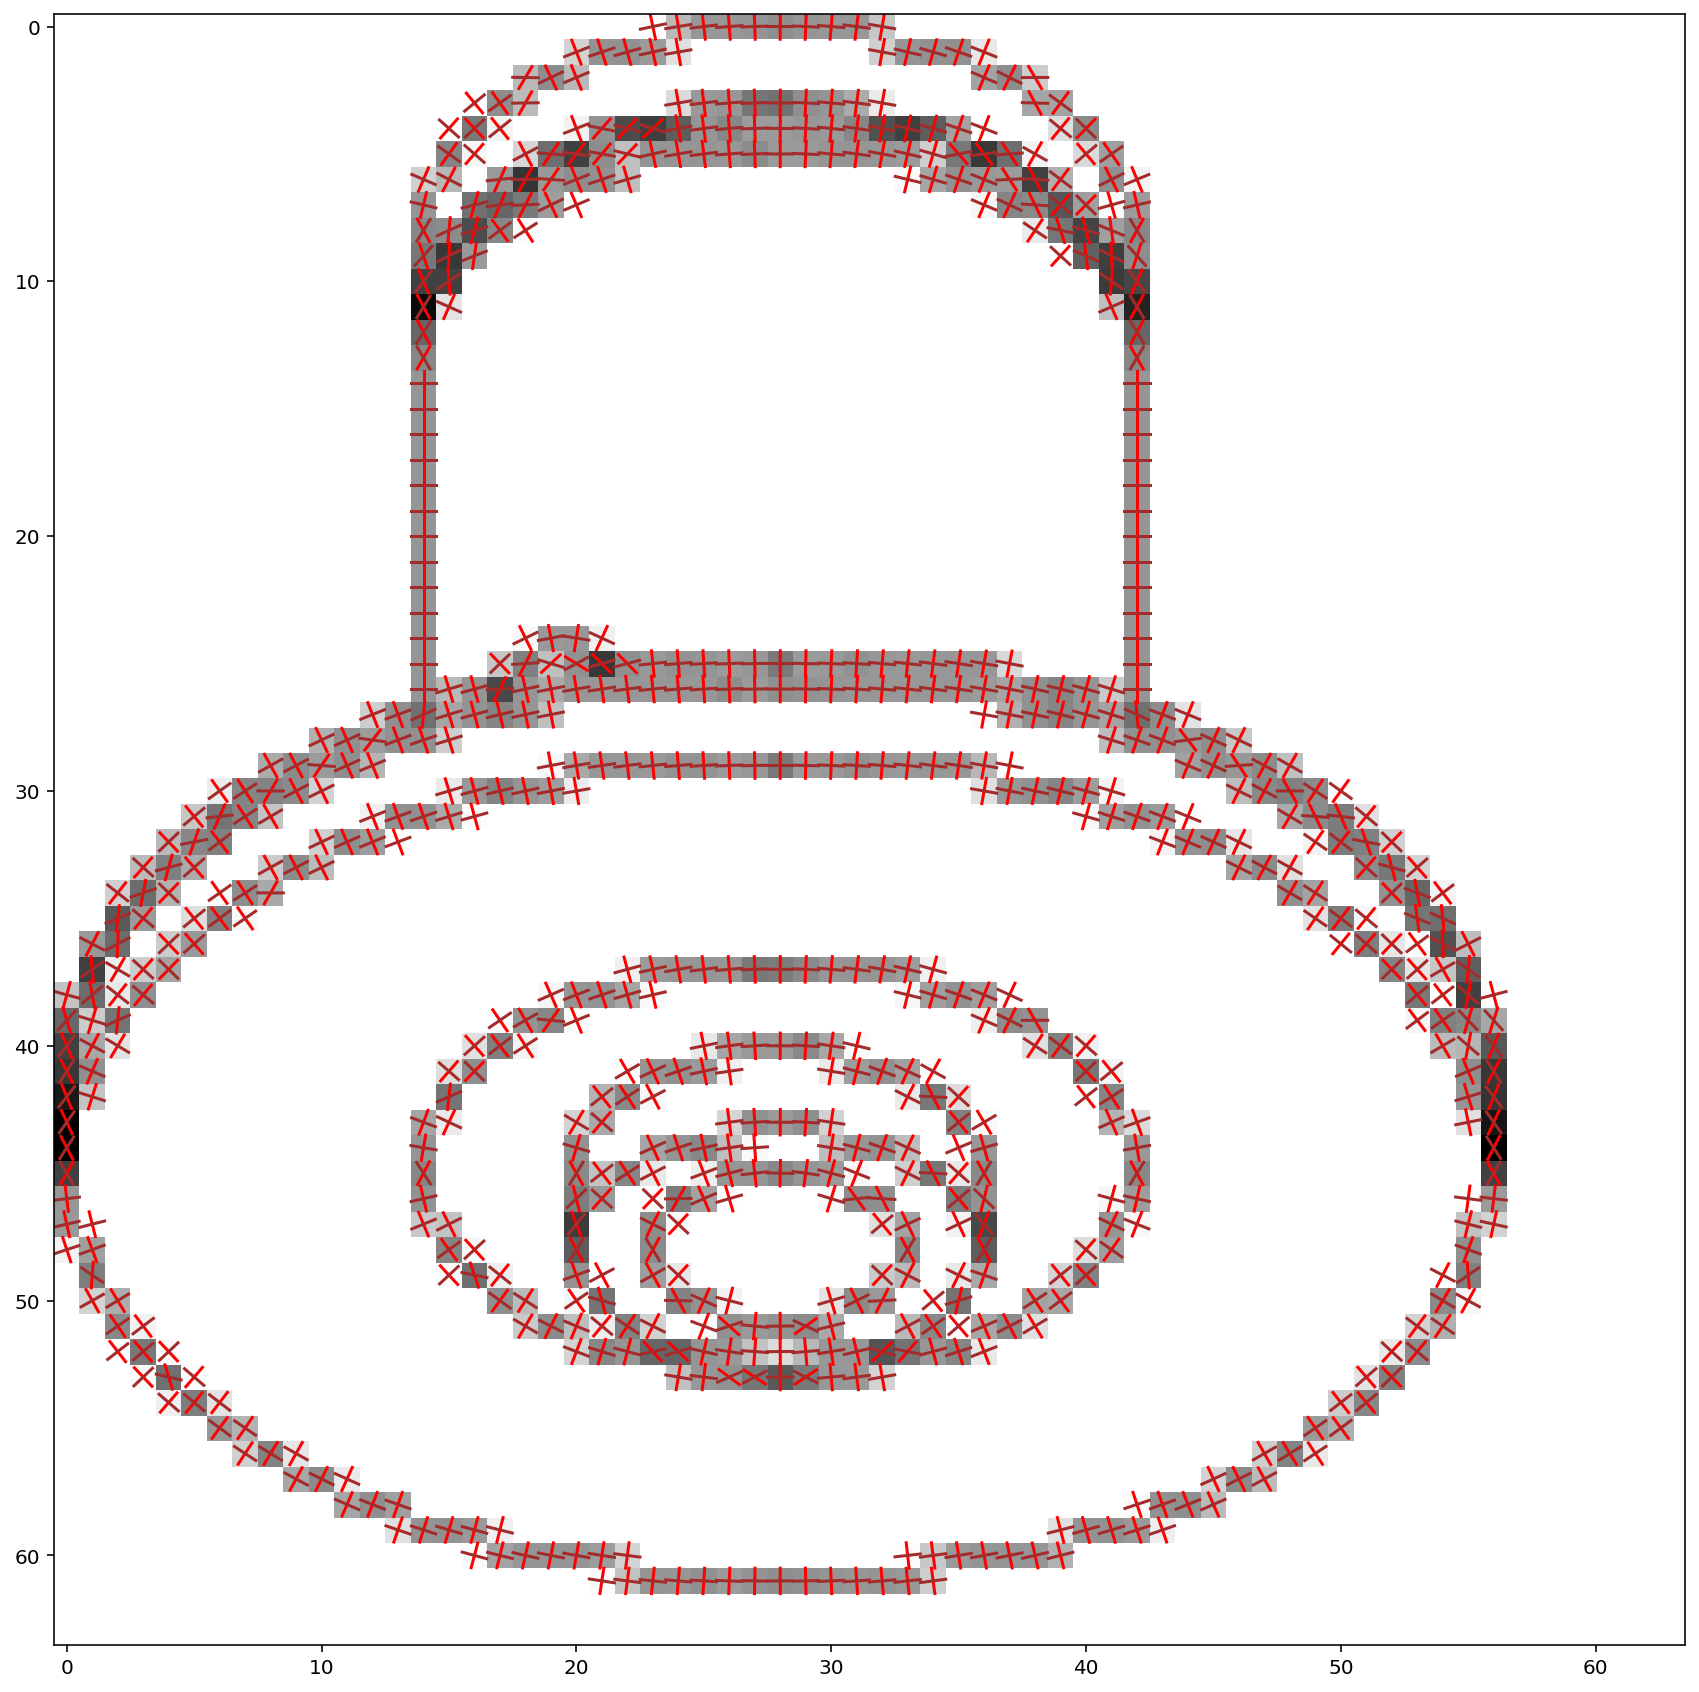

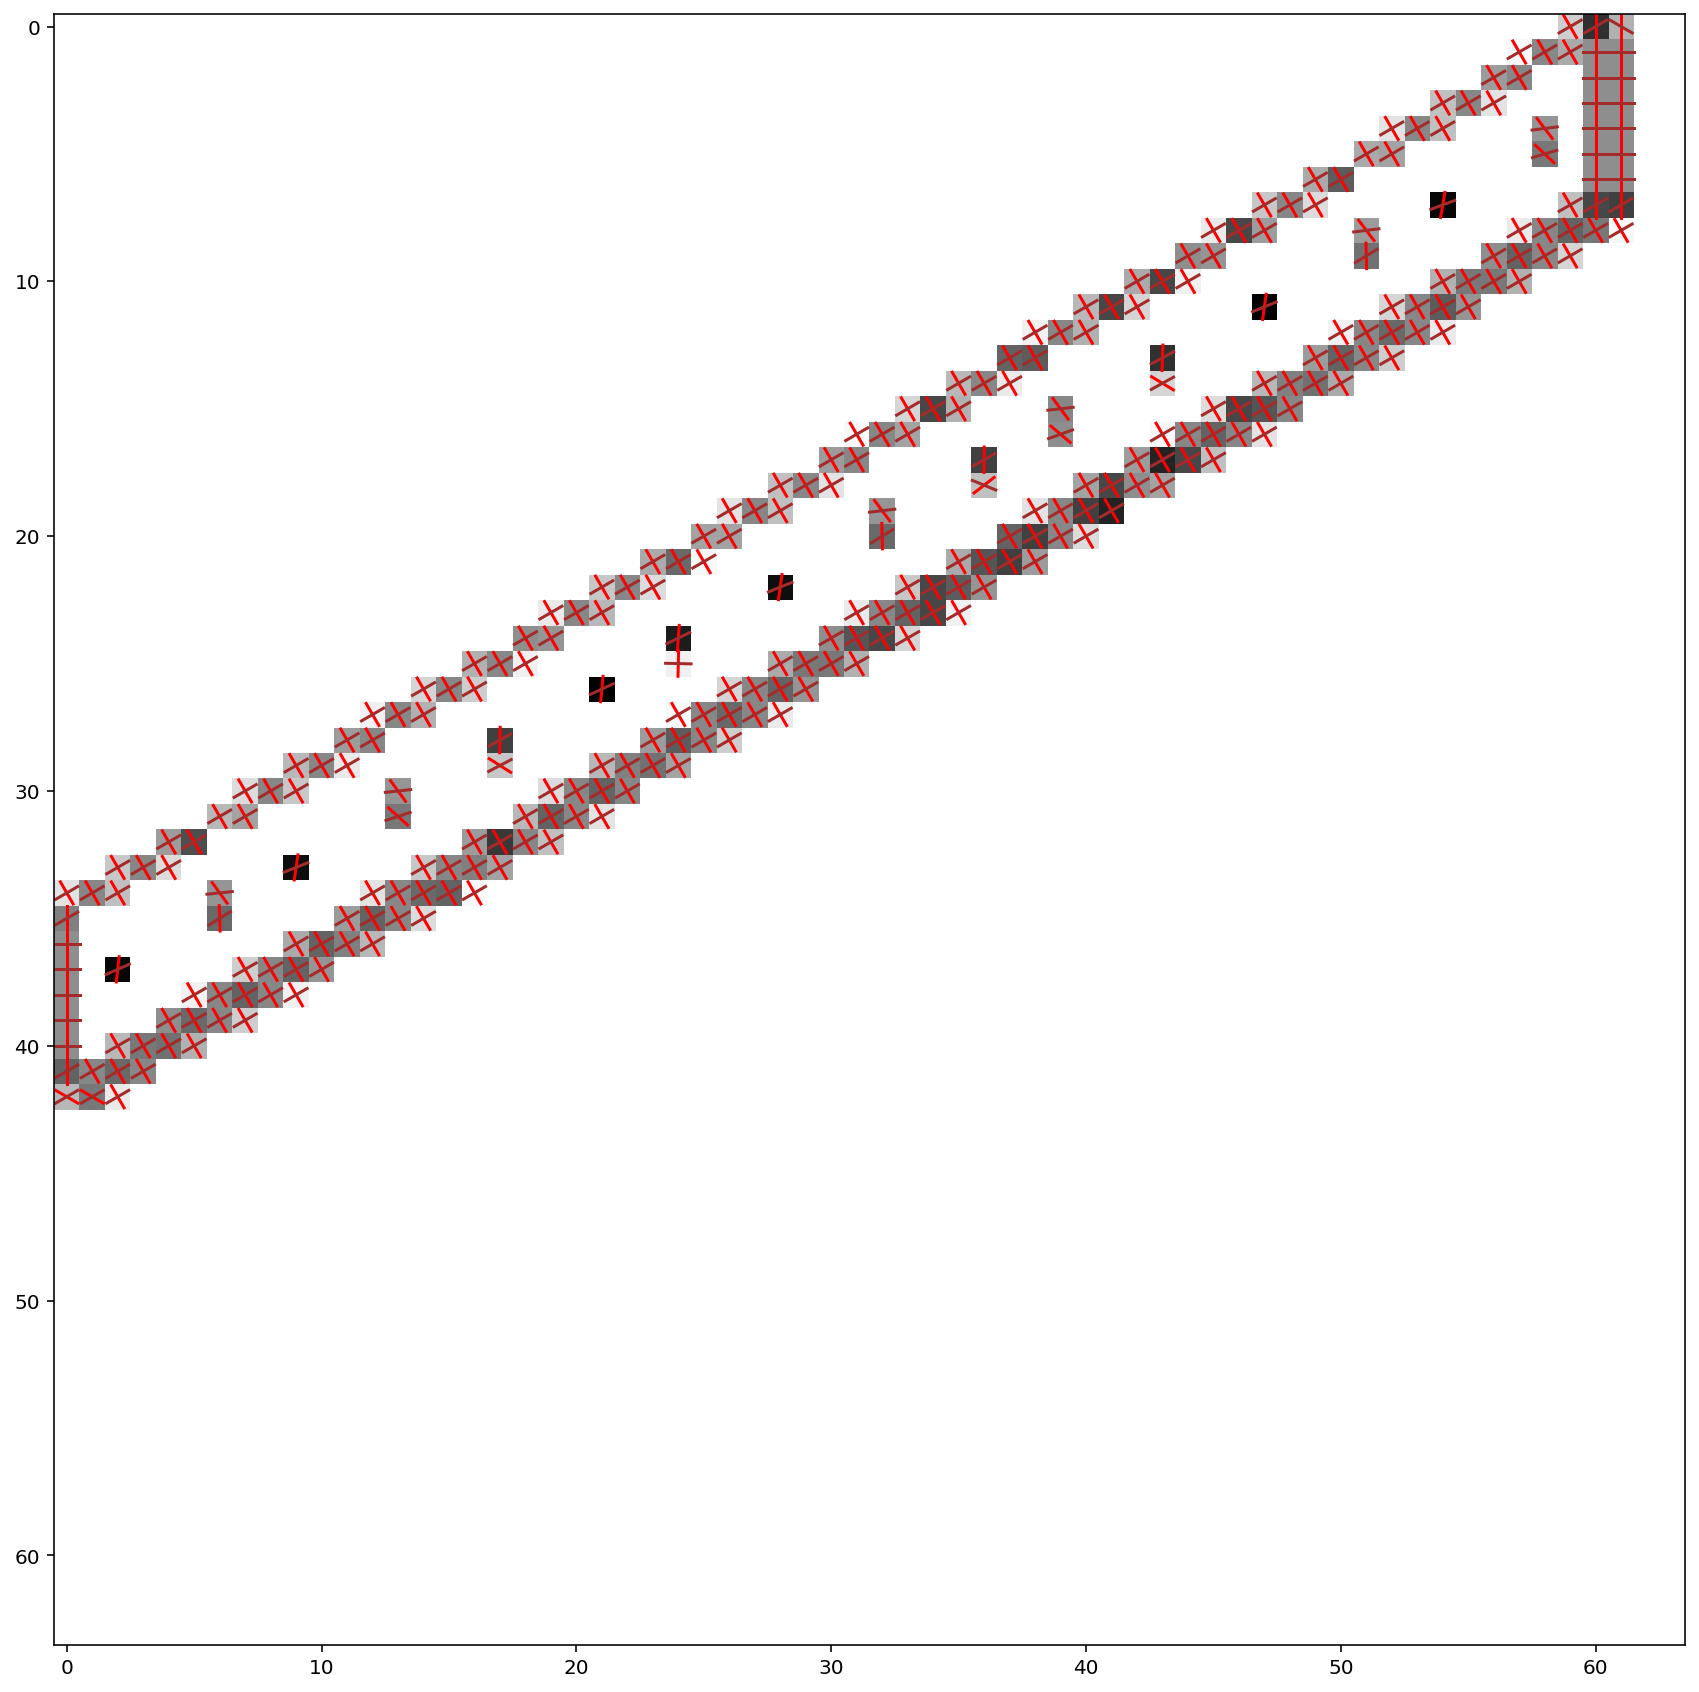

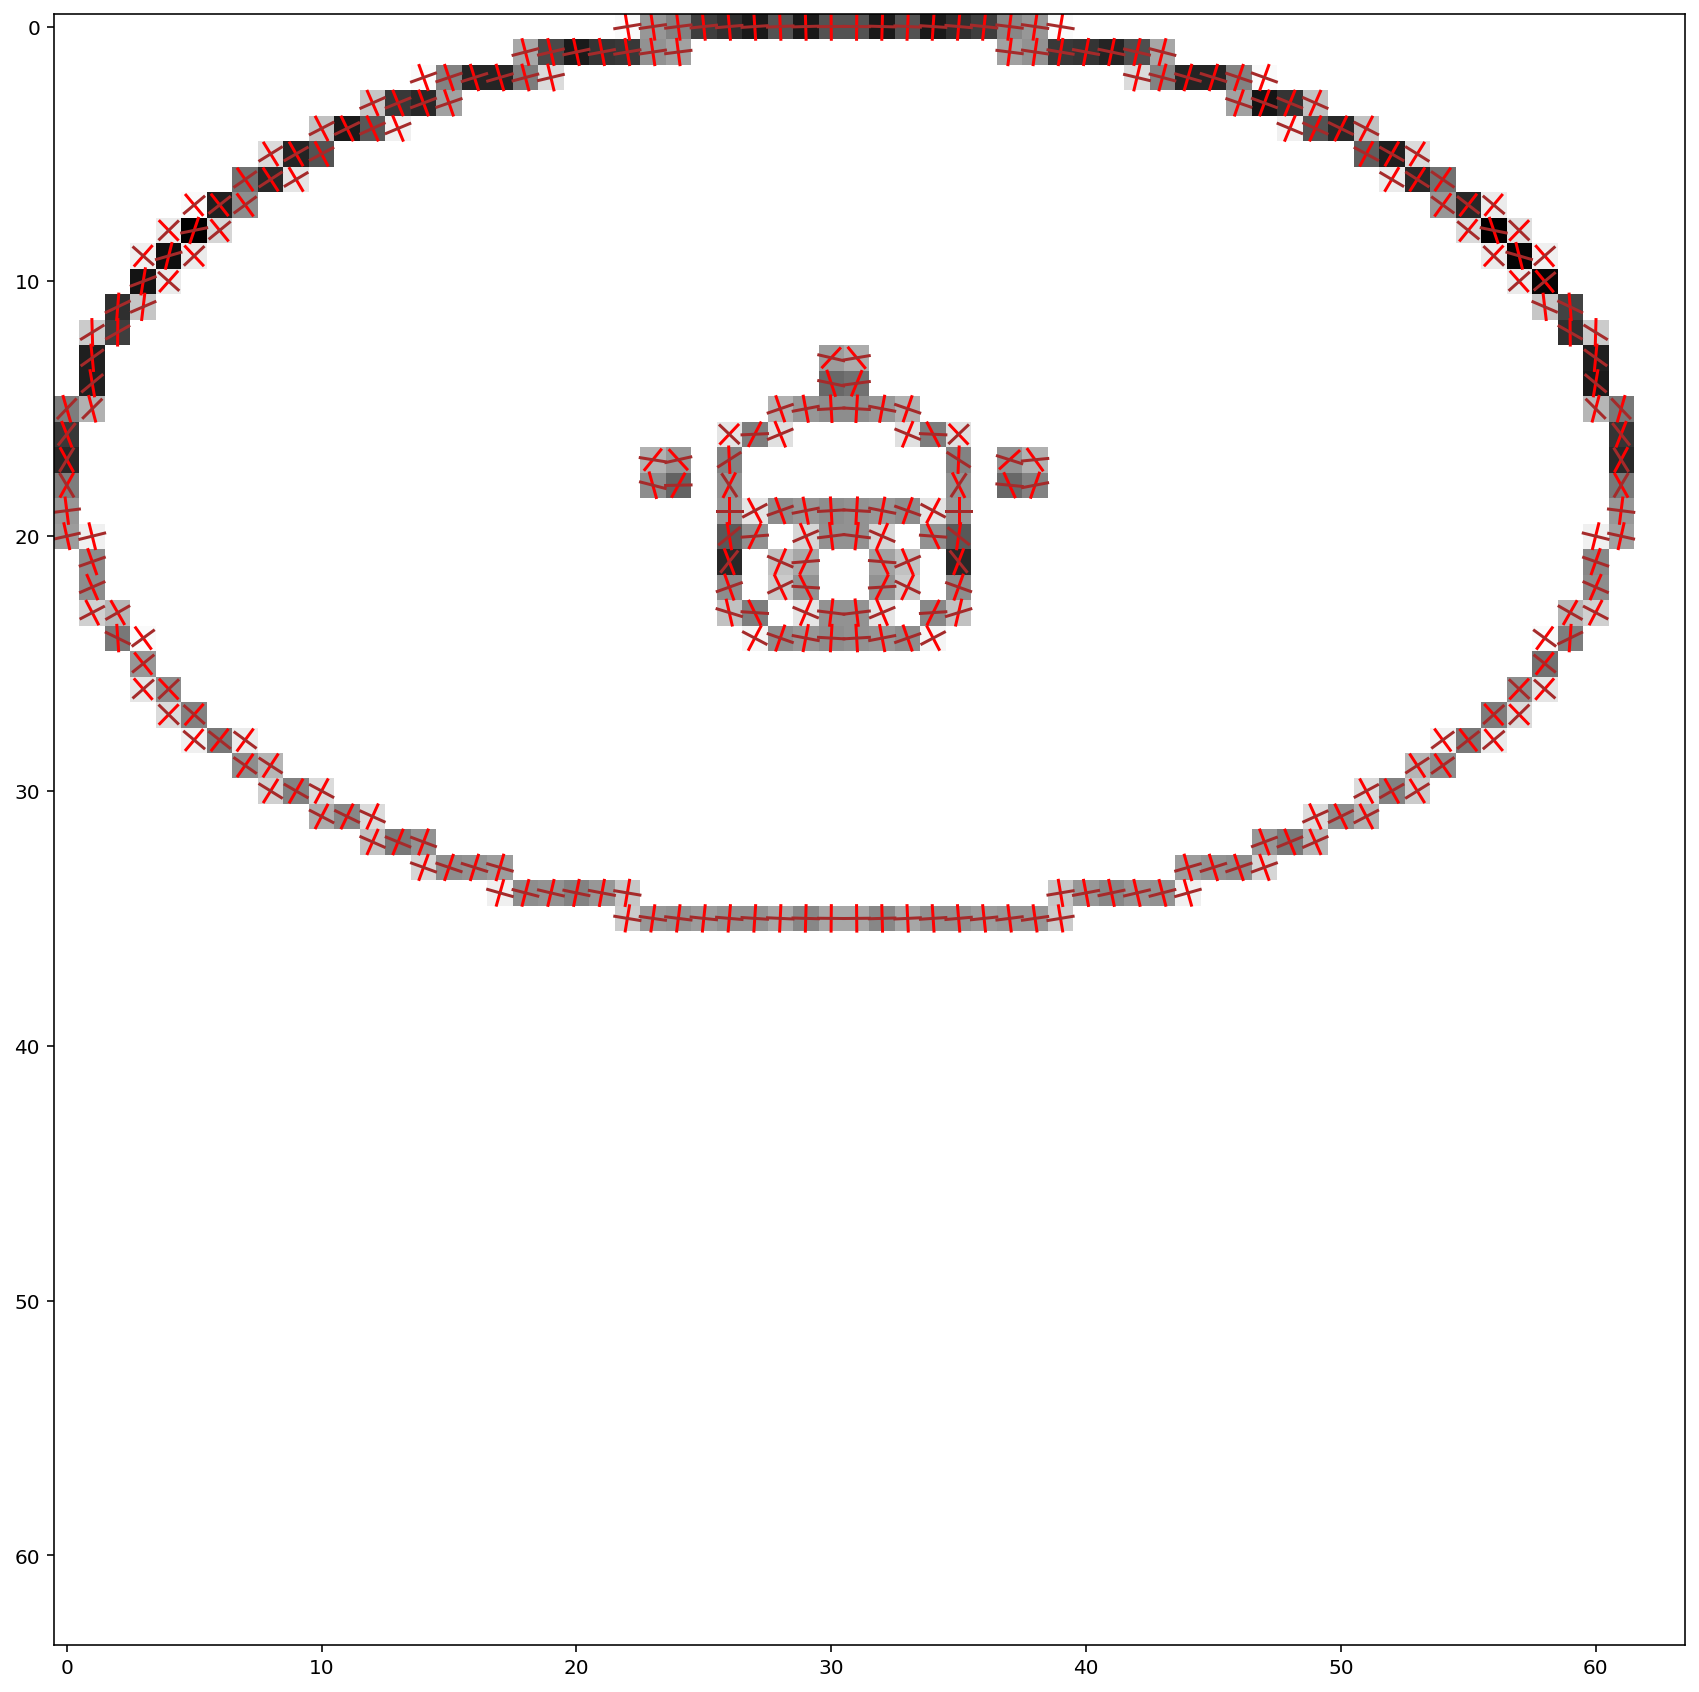

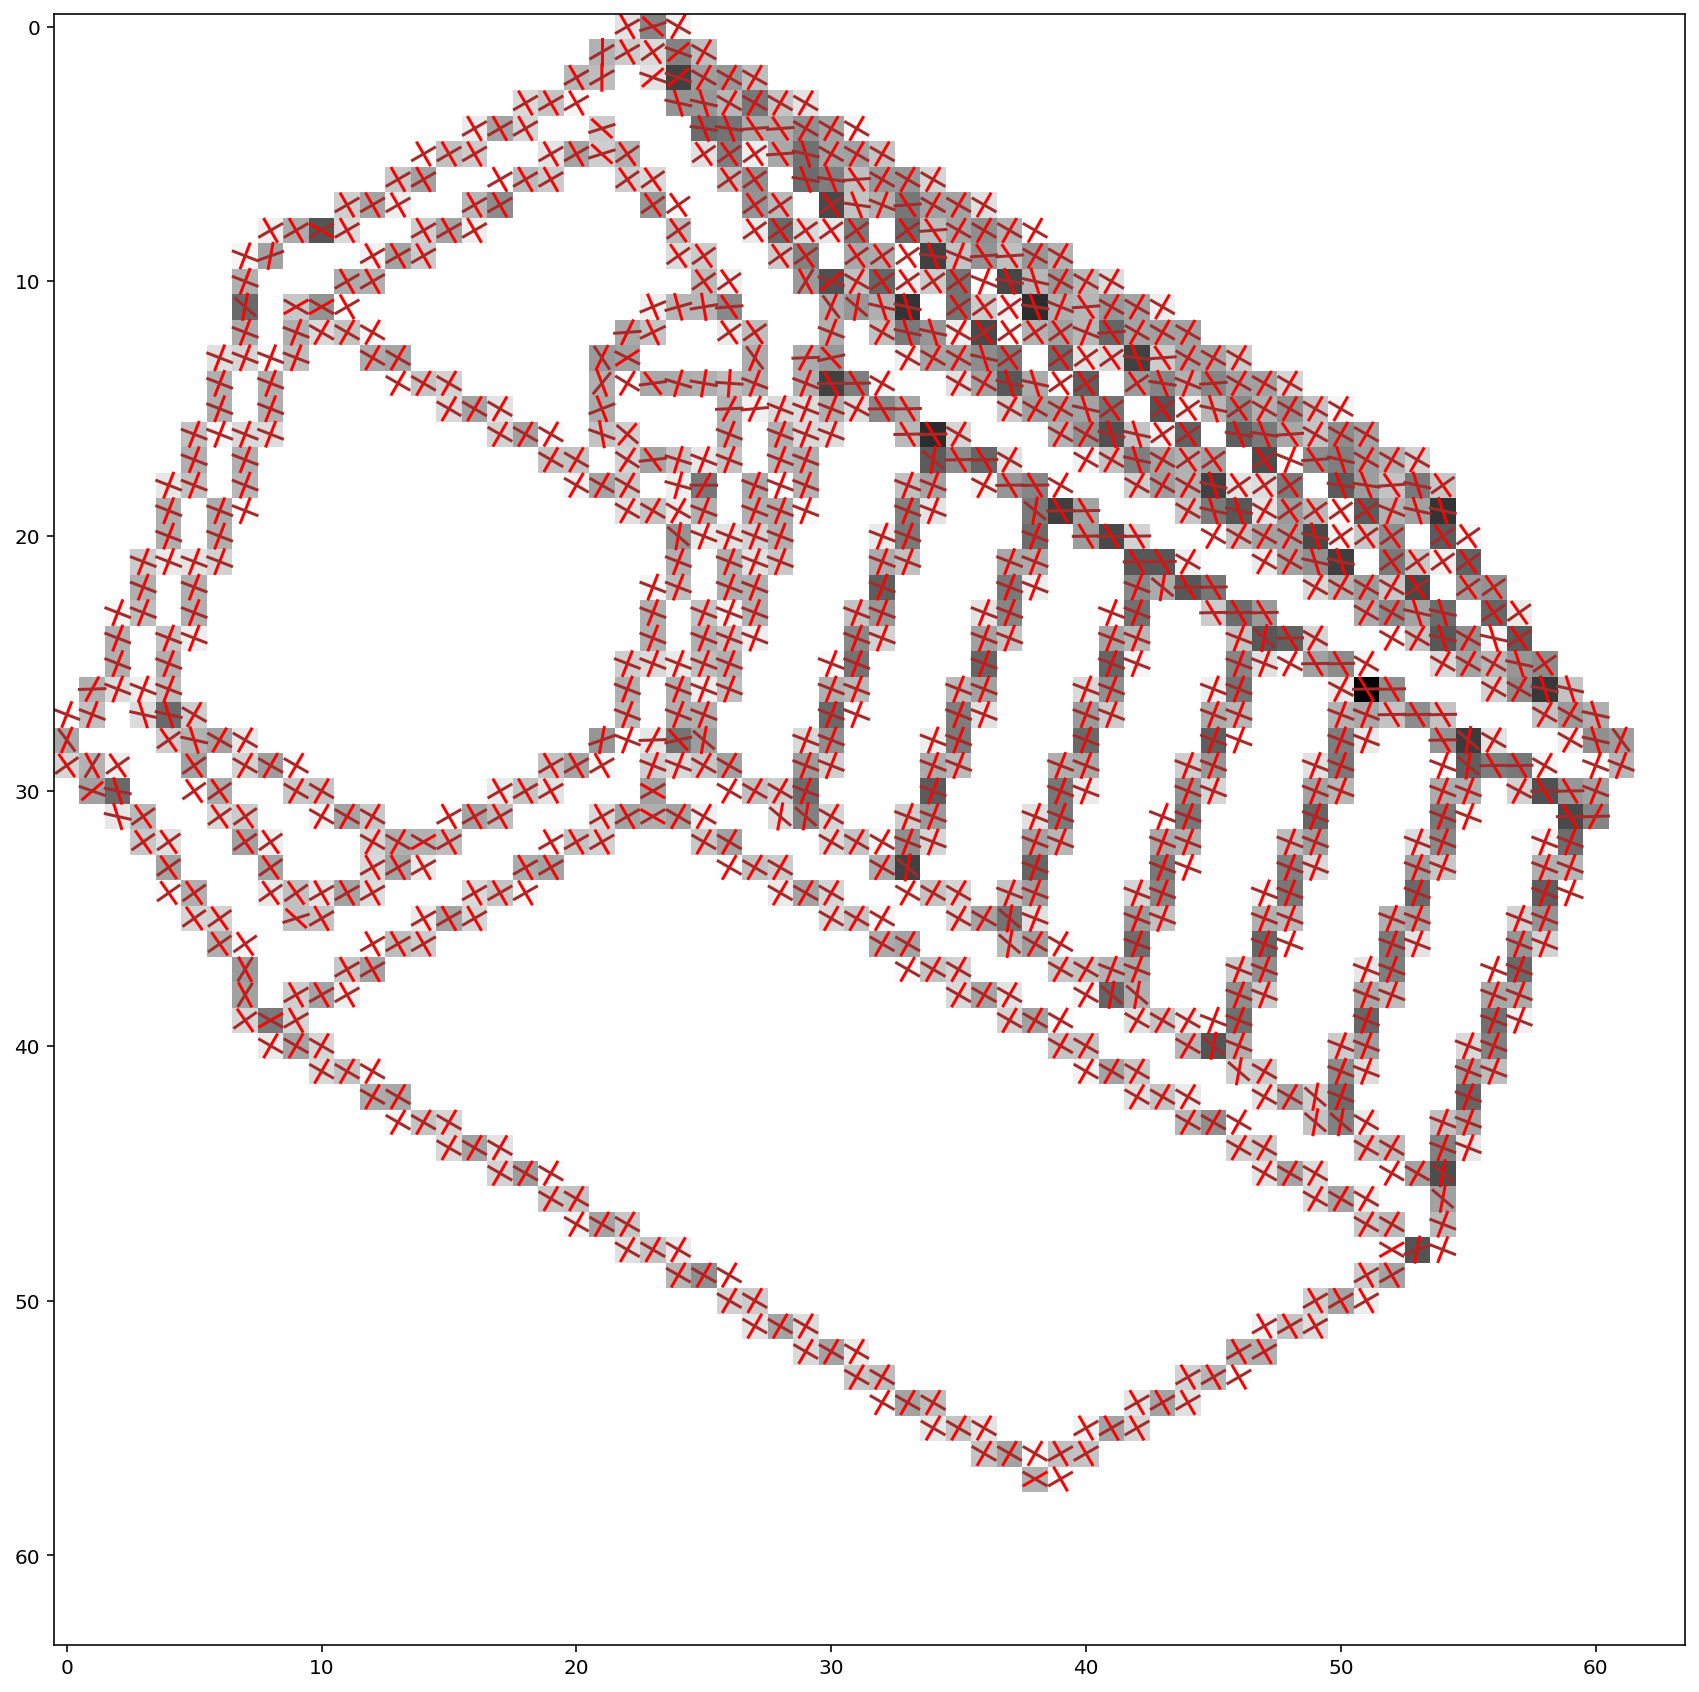

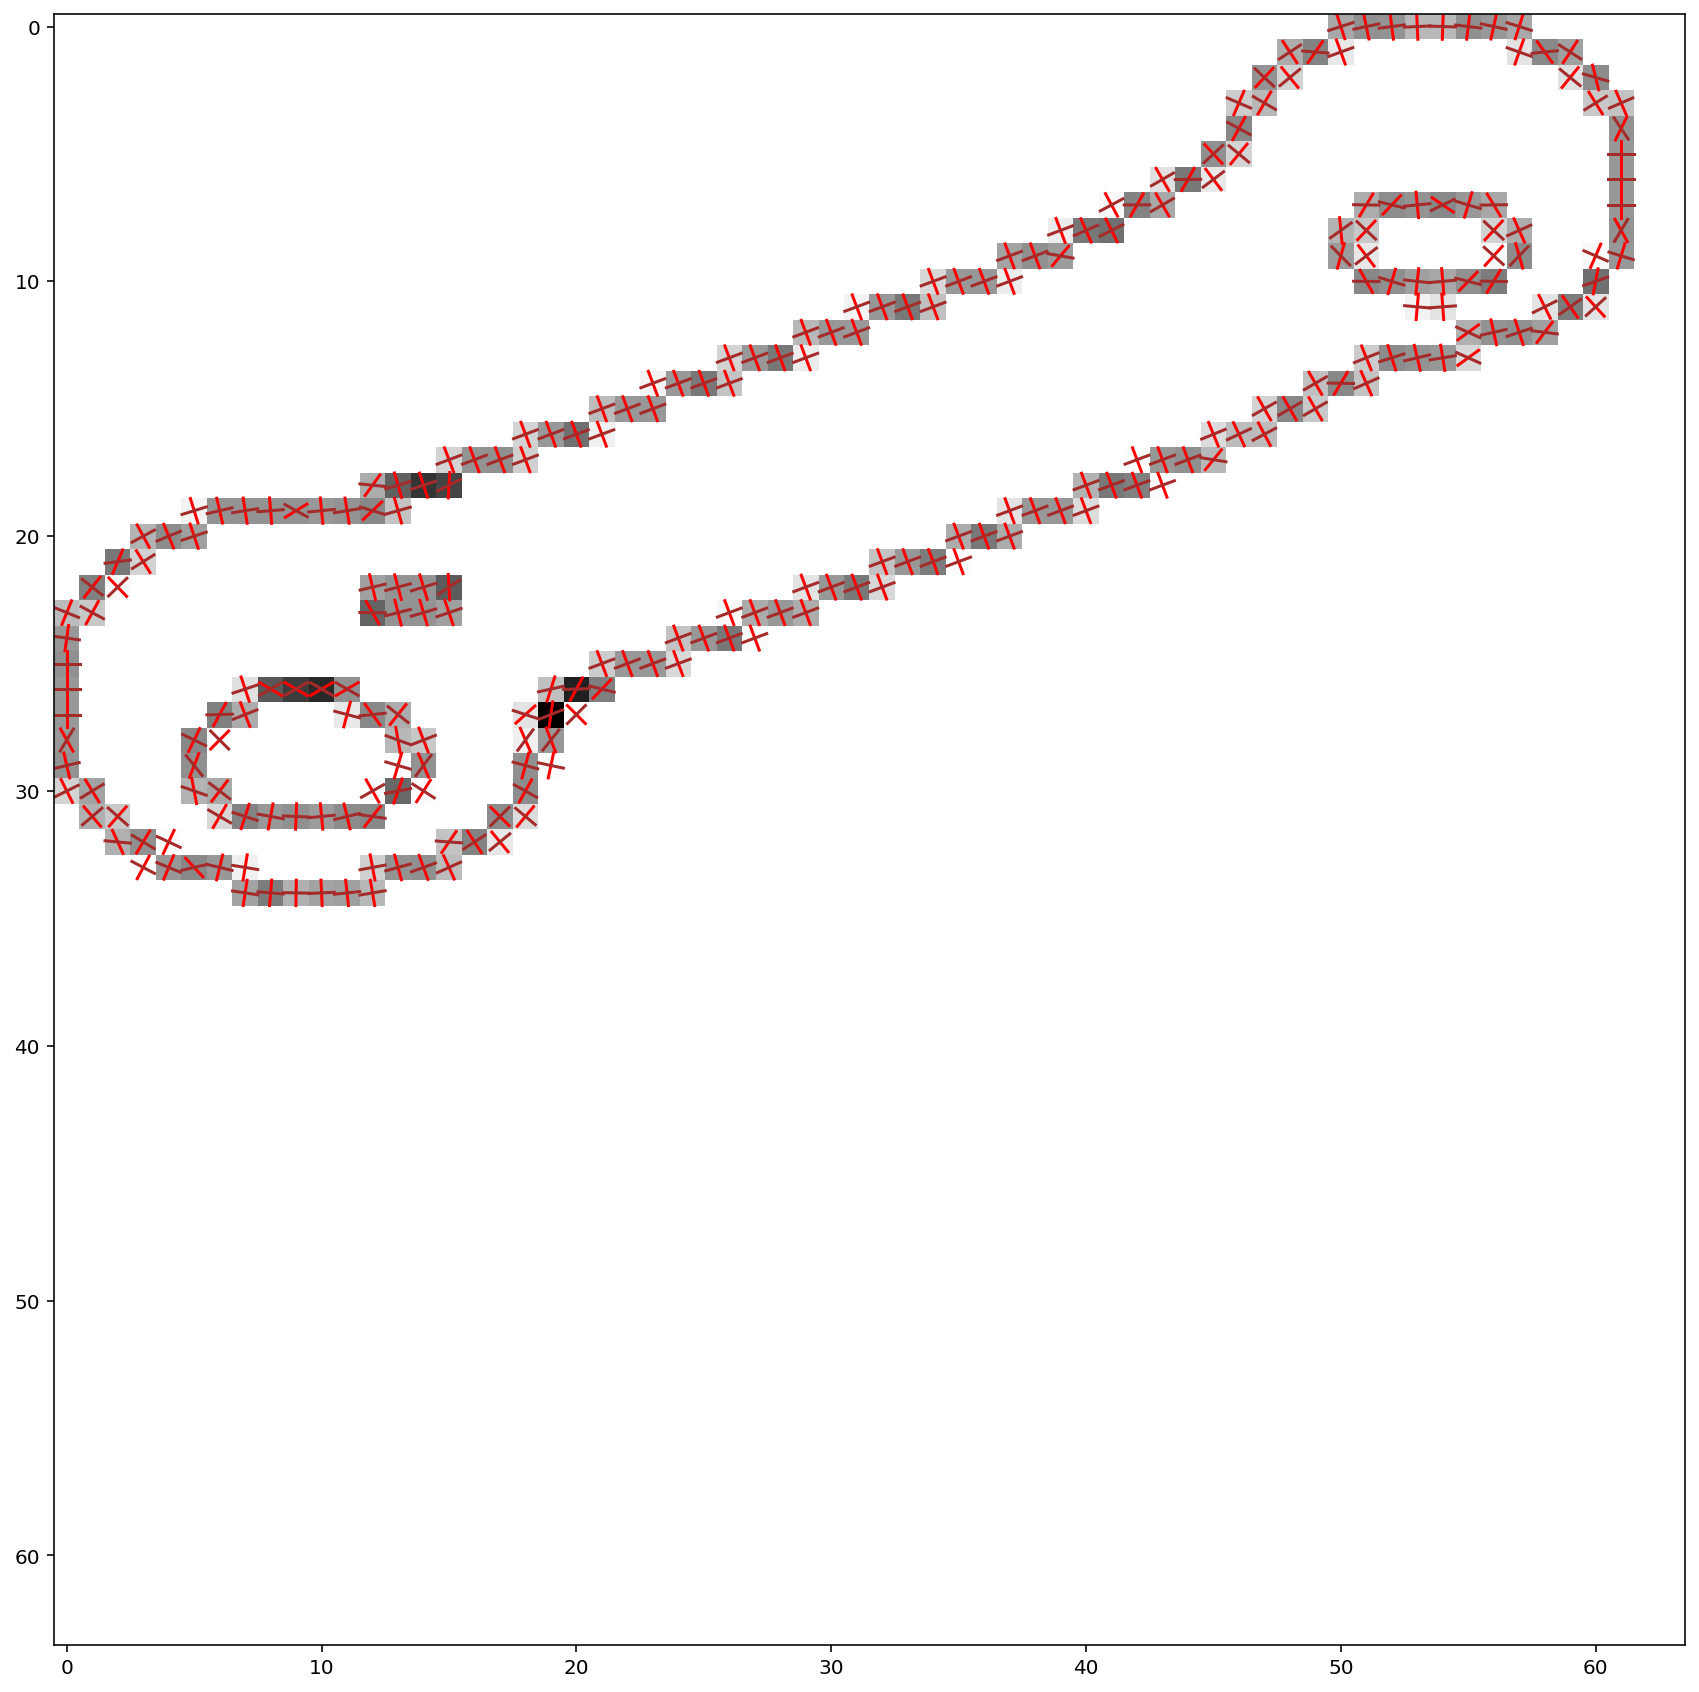

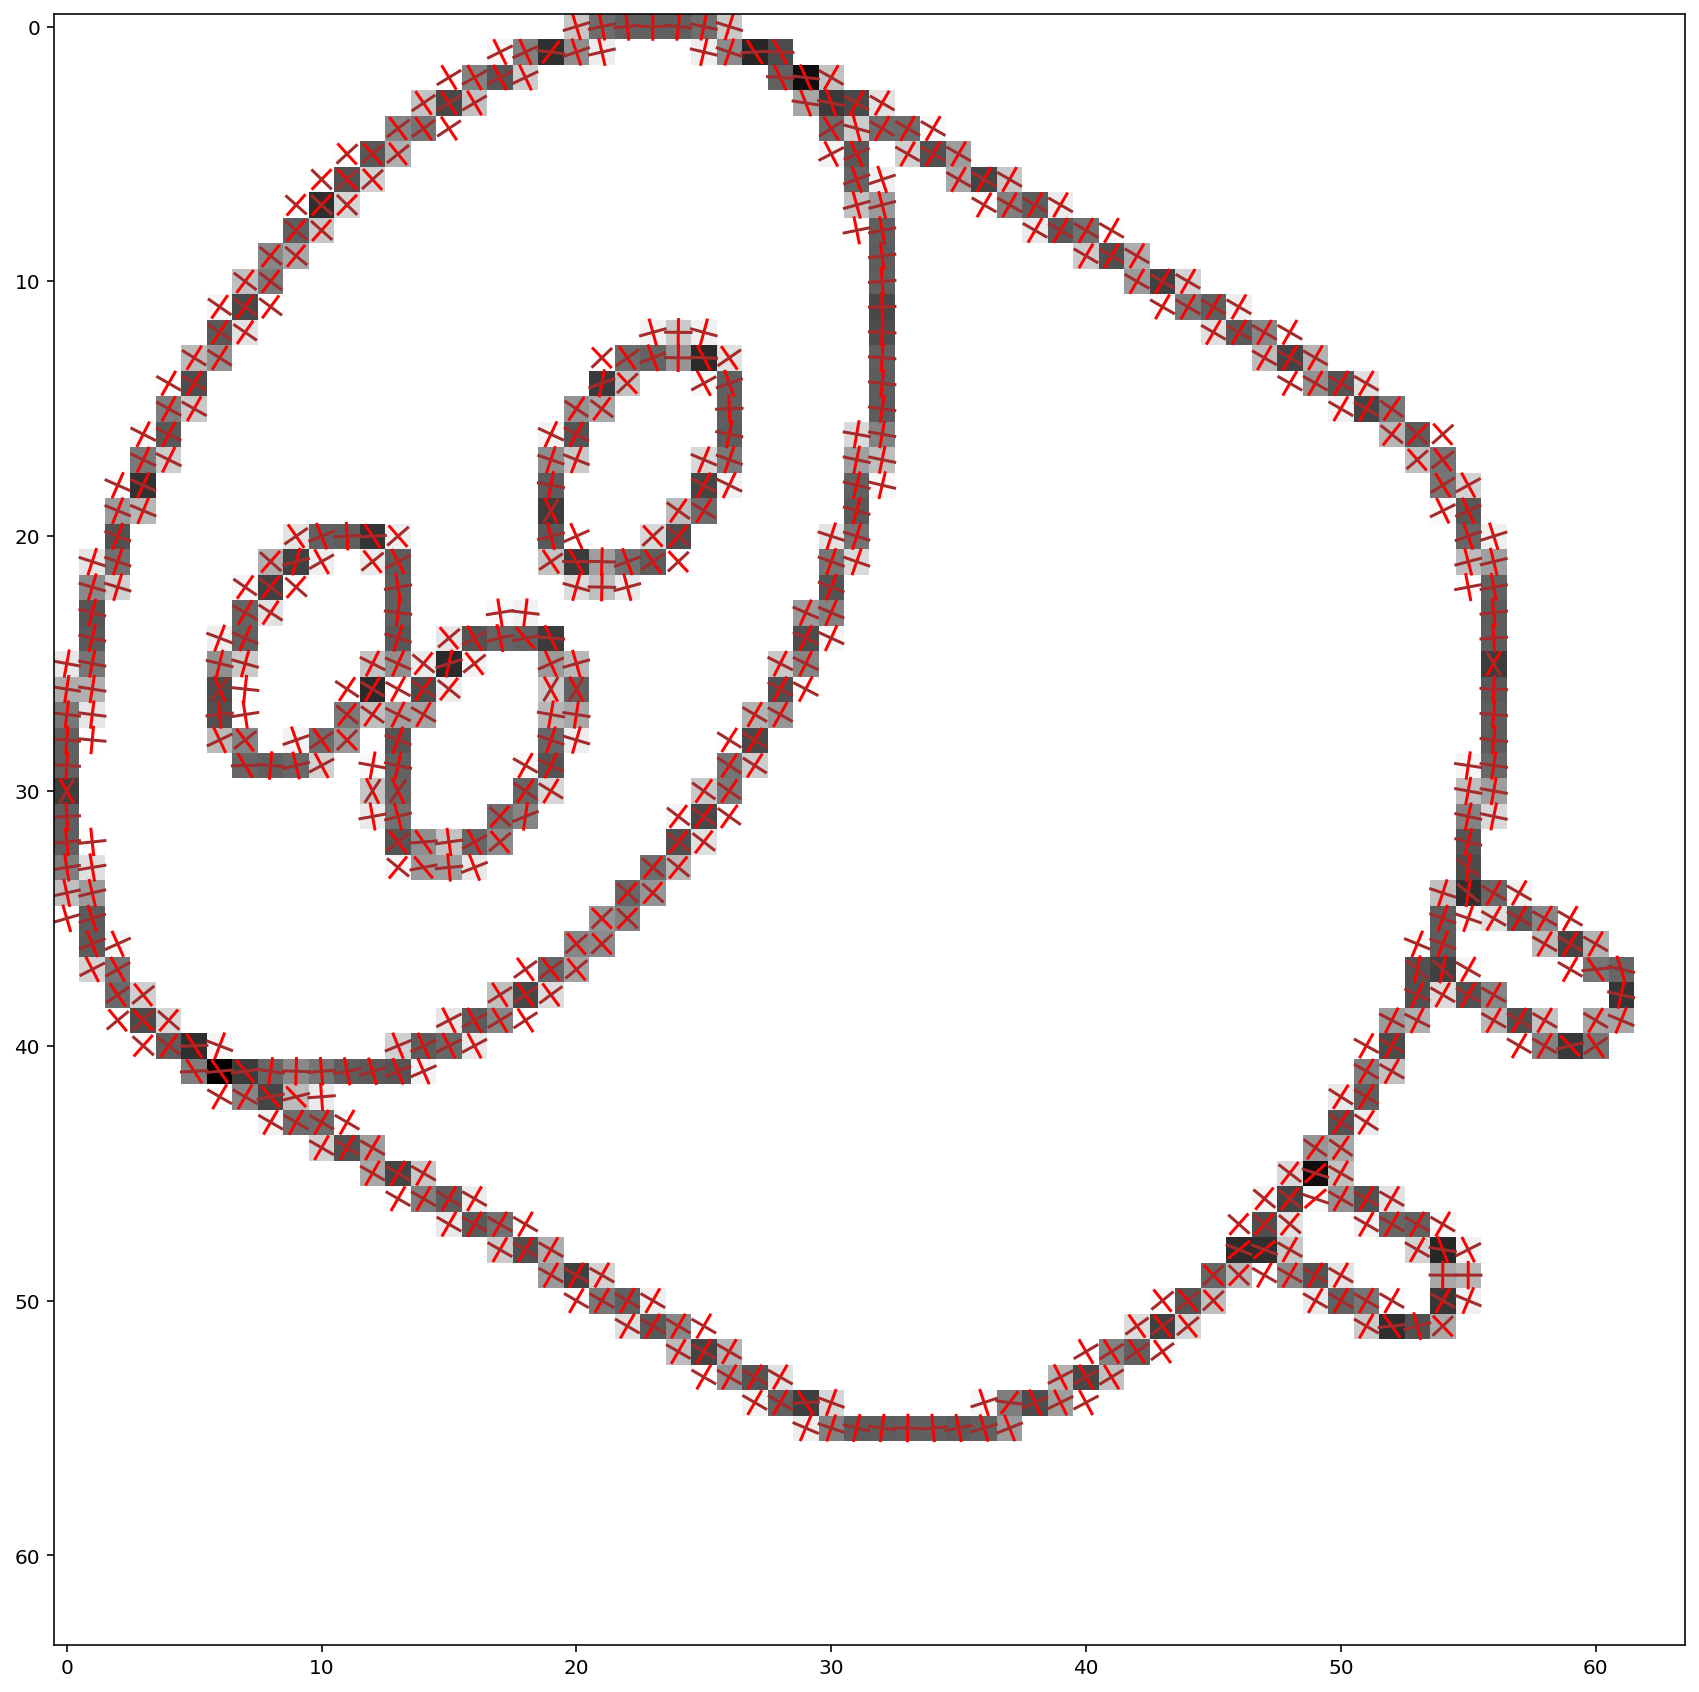

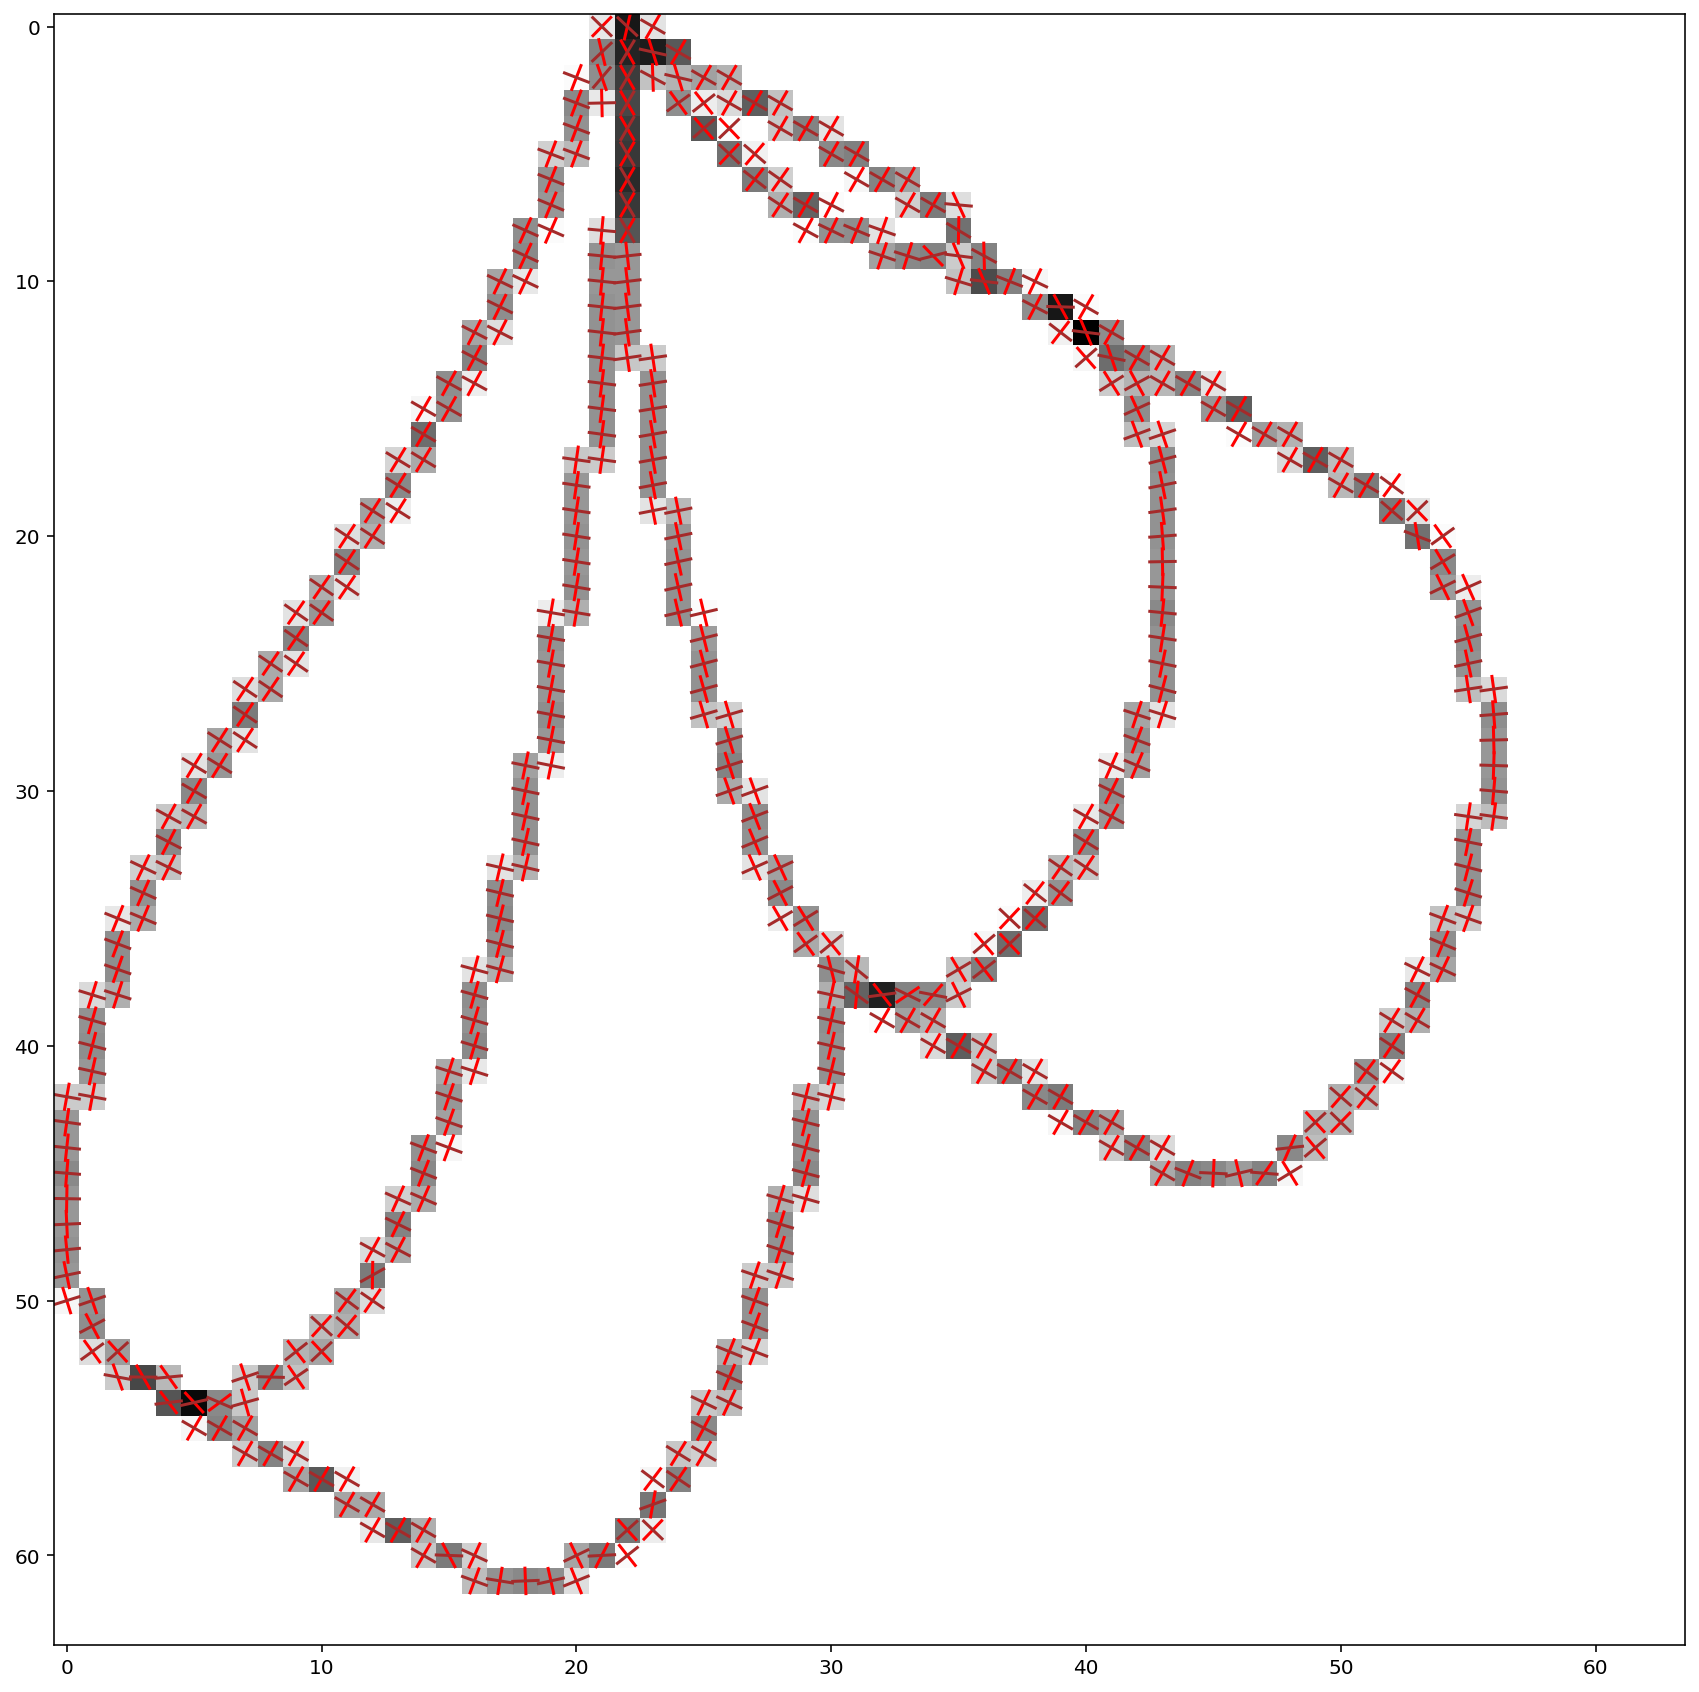

In [10]:
# out_path = '/home/mtaktash/data/abc_field_examples/'
# os.makedirs(out_path, exist_ok=True)

gen = PolyVectorFieldGenerator(smoothing_type='no_smoothing')

for svg_path in glob.glob('/home/mtaktash/data/abc_renders/abc_renders/*.svg')[:10]:
    img = VectorImage.from_svg(svg_path)
    adjust_viewbox(img, size=64)

    raster = img.render(cairo_render)
    field = gen.generate_vector_field(img)
    
    show_figure(plot_vector_field_cross(raster, field, figsize=(15, 15)))
    
#     np.save(os.path.join(out_path, os.path.basename(svg_path)[:-4] + '_field.npy'), field)
#     np.save(os.path.join(out_path, os.path.basename(svg_path)[:-4] + '_raster.npy'), raster)